# 신경망 모델
### - 이진 분류: 유방암 예측 사례

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

 - 데이터를 정규분포화

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, test_size=0.2 ,random_state = 2022)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # fully connected network

In [11]:
model = Sequential([Dense(100, input_shape=(30,), activation = 'relu'),
                Dense(24, activation = 'relu'), Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


 - 모델 컴파일

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

 - 모델 학습

In [13]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 67ms/step - loss: 9.1587 - accuracy: 0.5055 - val_loss: 3.5248 - val_accuracy: 0.6813
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 2.9592 - accuracy: 0.5659 - val_loss: 2.9748 - val_accuracy: 0.3956
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3826 - accuracy: 0.7060 - val_loss: 2.4278 - val_accuracy: 0.7692
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1.8923 - accuracy: 0.8104 - val_loss: 0.9449 - val_accuracy: 0.7473
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.1285 - accuracy: 0.6868 - val_loss: 0.5806 - val_accuracy: 0.8681
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6743 - accuracy: 0.8681 - val_loss: 0.7131 - val_accuracy: 0.8791
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7439 - accuracy: 0.9038 - val_loss: 0.6920 - val_accuracy: 0.8352
Epoch 8/100
4/4 [=====

 - 모델 평가

In [14]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8947


[0.3992118239402771, 0.8947368264198303]

 - 훈련과정 시각화: epoch에 따른 accuracy와 val_loss의 변화에 대해 관찰

In [16]:
y_acc = history.history['accuracy']
y_vloss =  history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

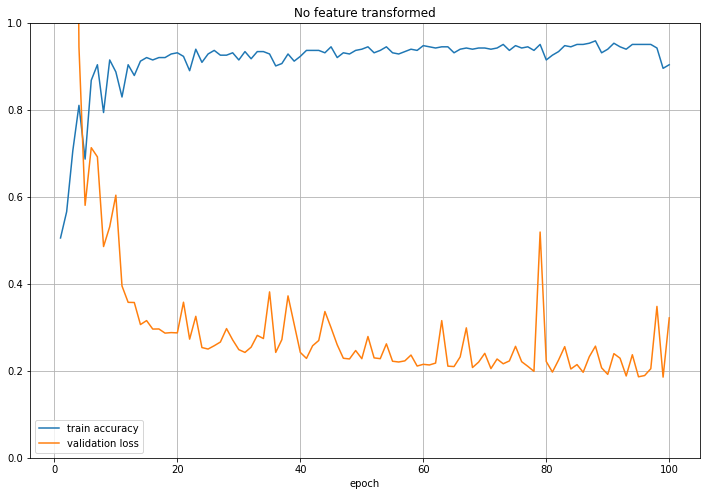

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.ylim([0,1])
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.title('No feature transformed')
plt.show()

### 2. 데이터를 정규/ 표준화 한 경우

In [20]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(cancer_std, cancer.target, stratify = cancer.target, test_size=0.2 ,random_state = 2022)

 - 모델 정의

In [22]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation = 'relu'))
model2.add(Dense(24, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


 - 모델 설정

In [23]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

 - 모델 학습

In [24]:
hist2= model2.fit(X_train2, y_train2, validation_split = 0.2, epochs = 100, batch_size=100 )

Epoch 1/100
4/4 [==============================] - 1s 98ms/step - loss: 0.6141 - accuracy: 0.6703 - val_loss: 0.5171 - val_accuracy: 0.7912
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.4857 - accuracy: 0.8571 - val_loss: 0.4194 - val_accuracy: 0.9231
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.3907 - accuracy: 0.9286 - val_loss: 0.3480 - val_accuracy: 0.9560
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.3237 - accuracy: 0.9505 - val_loss: 0.2962 - val_accuracy: 0.9451
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2719 - accuracy: 0.9533 - val_loss: 0.2572 - val_accuracy: 0.9560
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2314 - accuracy: 0.9560 - val_loss: 0.2259 - val_accuracy: 0.9560
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1997 - accuracy: 0.9643 - val_loss: 0.2011 - val_accuracy: 0.9560
Epoch 8/100
4/4 [===

 - 모델 평가

In [25]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 5ms/step - loss: 0.0684 - accuracy: 0.9825


[0.06836909055709839, 0.9824561476707458]

In [26]:
y_acc2 = hist2.history['accuracy']
y_vloss2 =  hist2.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

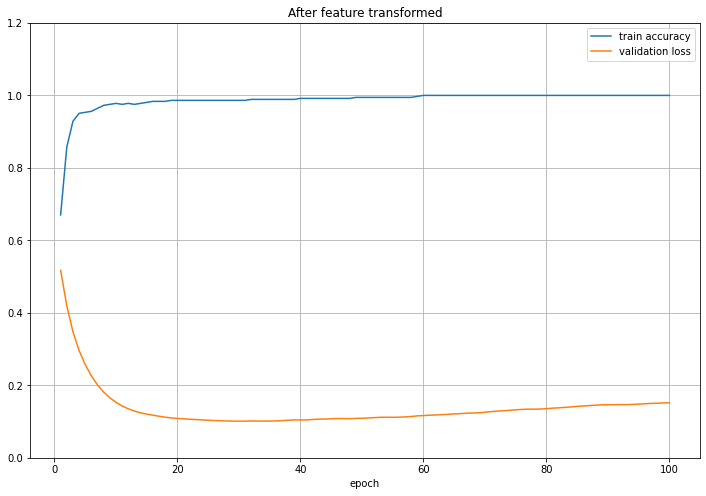

In [28]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs, y_vloss2, label='validation loss')
plt.ylim([0,1.2])
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.title('After feature transformed')
plt.show()